**QUORA ANALYSIS**

## 1. Elementary Work

> Import Libraries

The first step in the project is to identify and import the necessary python libraries for the analysis. Numpy, Pandas, Matplotlib and Seaborn are the primary requirements for the project. The Natural Language Processing toolkit is also required further in the analysis to extract text features.


> Load the dataset


The dataset used here is first saved in the same location as the code file and  being loaded from a local PC.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/questions.csv")

**2. Exploratory Data Analysis**

One the dataset is imported into the jupyter notebook, it is important to understand the attributes and the nature of the dataset. This gives a clear view of what to expect from the analysis results.

The dataset contains 404351 rows and 6 columns meaning that there are 404351 question pairs in total.

In [ ]:
df.shape

(404351, 6)

From the below overview of the dataset, it is clear that we have 2 columns with text that is the questions and the remaining columns have numeric values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


It is found that the dataset has 3 missing values. The missing values are just dropped and not considered in this analysis because filling in the missing text values is quite a rigorous task and removing 3 rows out of the 404348 rows does not make much difference to the analysis.

In [ ]:
df.dropna()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


> **Data Sampling:**
The dataset is  sampled to extract 30000 rows randomly. This is done to reduce the computational power required to process such a huge dataset.


In [ ]:
new_df=df.sample(30000,random_state=2)

> **Viewing the data**

First, the new data frame is created using sampling and the head of the data frame is seen to get a clear view of the data in it.

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


>** Duplicate values**

It is seen that there are no two rows which are entirely same or are exact duplicates of each other.

In [ ]:
new_df.duplicated().sum()

0

> **Distribution of duplicate and non-duplicate pairs**

rom the above graph, it is evident that the number of non-duplicate question pairs is more than twice the number of duplicated question pairs. Hence, the data is unbalanced here.

is_duplicate
0    18918
1    11082
Name: count, dtype: int64
is_duplicate
0    63.06
1    36.94
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

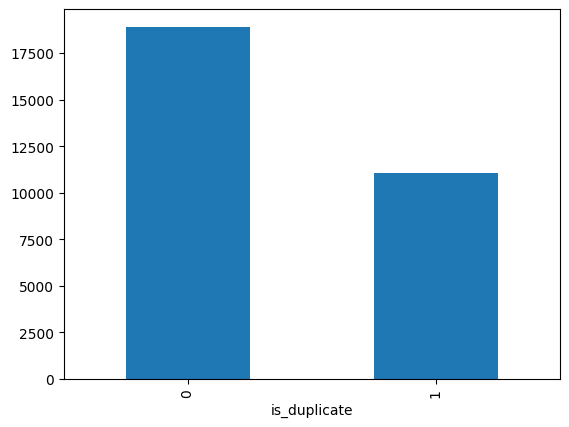

In [ ]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

** Number of occurrences of repeated questions**


It is also important to see the number of occurrences of the repeated questions. There are about 176 repeated questions and 59795 non-repeated questions. Here, ‘questions’ are obtained by converting all the strings in ‘question1’ and ‘question2’ columns.

In [ ]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59795
Number of questions getting repeated 176


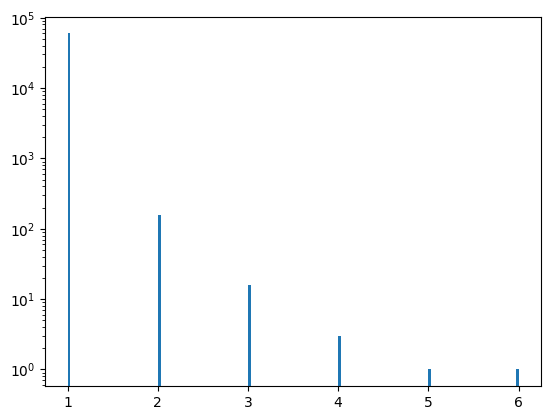

In [ ]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

> **3. Text Preprocessing**

Textual data extracted from web or platforms like  Quora contains a lot of redundant data like numbers, short forms, special characters, irregular data formats etc.,. In order to standardize the text question, text pre-processing is performed.

>** Removing redundant data**

To get rid of any miscellaneous data, a special function is defined. The functionality of the function is as follows:

1. Convert all text into lower case.
2. Replace certain special characters like ‘%’, ‘$’, ’@’, ’₹’, ’€’ with their string equivalents.
3. Replace numbers with string equivalents for instance replace ‘000,000,000’ with ‘b’.
4. It is important to deconstruct words and replace them like “ain’t” with “am not”, “who’s” with “who is” etc.,.

In [ ]:
import re
import pandas as pd
from bs4 import BeautifulSoup  # ✅ Import BeautifulSoup


def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
        "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
        "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

After we define the function, it is applied to the ‘question1’ and’ ‘question2’ columns of the data frame.

In [ ]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

> **4. Feature Engineering and Feature Extraction**

Now that the data is clean processed, it is now ready to use for analysis.

Feature Engineering and Extraction is performed in two main stages.

(1) Basic features

(2) Token features

Basic features like questions length, number of words in the questions, number of common words etc., are first extracted from the existing data.

Token features are associated with individual tokens in a text corpus or a set of strings. For instance, ratio of common words to the length of the smaller question between the question pair is labelled as the ‘minimum common word count’ or ‘cwc_min’ in this analysis.

Length based features are those features that are extracted on the length of the questions.

**Extracting Basic Features**

There are 7 main features that can directly be analyzed first. They are:

q1_len - Character length of question1.
q2_len - Character length of question2.
q1_num_words - No. of words in question1.

q2_num_words - No. of words in question2.

word_common - No.of words that occur in both in question1 and question2.

word_total - Total number of words in question1 + total number of words in question2.

word_share - words_common/words_total

Here, we extract these features for each question pair that is for each row in the data frame.

**Extracting question lengths and no. of words**

In [ ]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


**Extracting number of common words in each question pair**

In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19,0.21
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32,0.06
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,0.48
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18,0.28
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19,0.16


> **Extracting total number of words in a pair of questions**


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19


**Extracting the ‘word_share’ among the questions**

In [ ]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19,0.21
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32,0.06
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,0.48
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18,0.28
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19,0.16


**Analyzing basic features**

Minimum, maximum and average characters in ‘question1’

Using the q1_len feature,


minimum characters 2
maximum characters 332
average num of characters 59


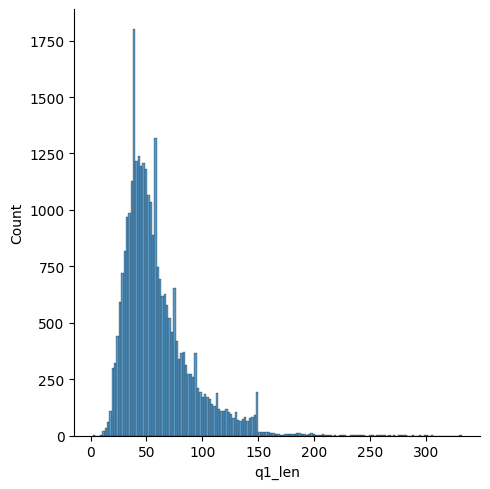

In [ ]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

Minimum, maximum and average characters in ‘question2’


minimum characters 3
maximum characters 1151
average num of characters 59


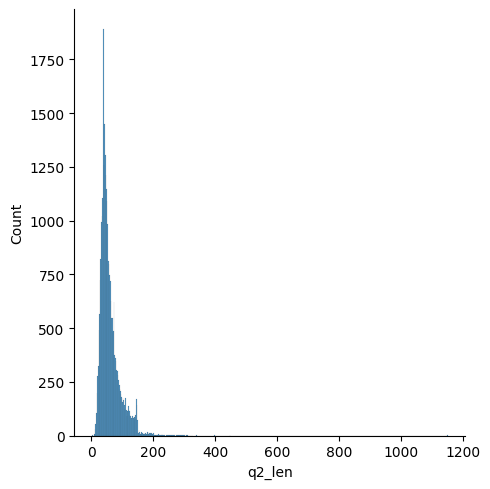

In [ ]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

Minimum, maximum and average words in ‘question1’

minimum words 1
maximum words 63
average num of words 10


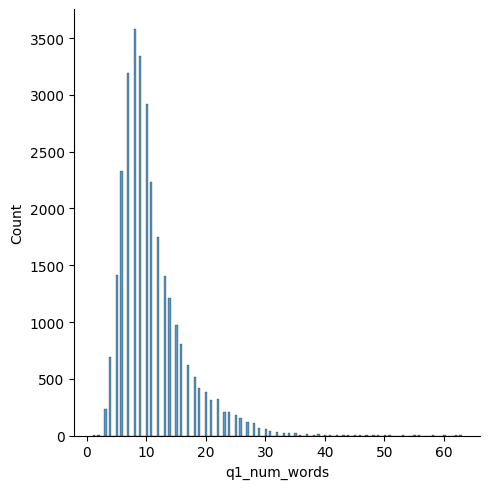

In [ ]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

Minimum, maximum and average words in ‘question2’

minimum words 1
maximum words 237
average num of words 11


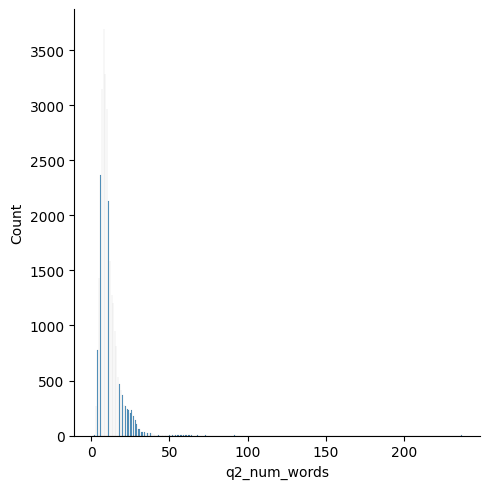

In [ ]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

Analyzing the effect of common words on the similarity of the questions

<ipython-input-74-e370b529e03d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
<ipython-input-74-e370b529e03d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='du

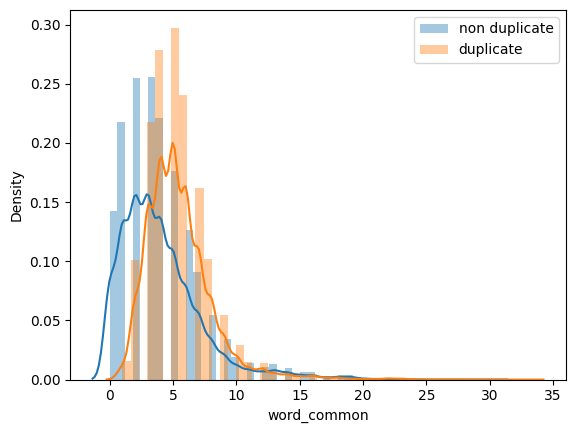

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

Analyzing the effect of total words in the questions

<ipython-input-75-26d998213aba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
<ipython-input-75-26d998213aba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='dupl

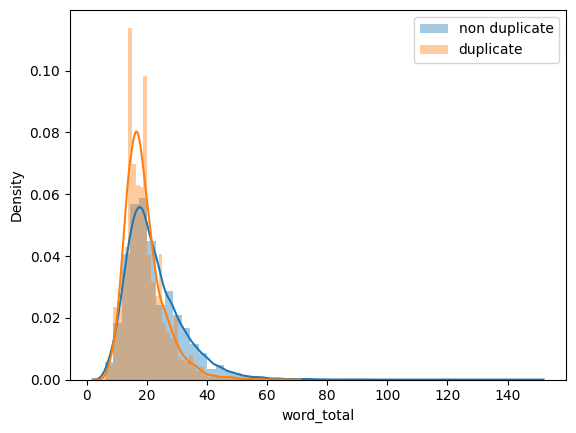

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-76-b227c944a5ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
<ipython-input-76-b227c944a5ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='dupl

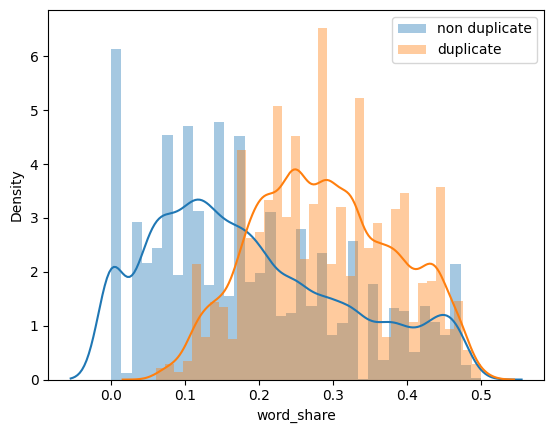

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

**Extracting token features**

There are 8 main token features extracted for this analysis. They are:

`cwc_min` stands for "minimum common word count". It is the ratio of the number of common words between two questions to the length of the smaller question.

`cwc_max`  refers to the “ratio of common words to the length of the larger question between the question pair".

`csc_min` stands for "minimum stop word count". It is the ratio of the number of stop words that occur in both question 1 and question 2 to the length of the shorter question between the question pair.

`csc_max` stands for "maximum stop word count". It is the ratio of the number of stop words that occur in both question 1 and question 2 to the length of the longest question between the question pair.

`ctc_min` stands for “minimum token count”. It is the ratio of the number of tokens that are present in both question 1 and question 2 to the minimum number of tokens between the question pair.

`ctc_max` stands for “maximum token count”. It is the ratio of the number of tokens that are present in both question 1 and question 2 to the maximum number of tokens between the question pair.

`last_word_eq` stands for ‘last word equal’. It has numeric values; 1 if the last word in the question pair is equal and 0 if not equal or same.

`first_word_eq` stands for ‘first word equal’. It has numeric values; 1 if the first word in the question pair is equal and 0 if not equal or same.

First, a function is defined to extract all the token features mentioned above.

In [ ]:
def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1
    q2_tokens = q2

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))



    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

New columns are created and filled in with the values returned by the function.

In [ ]:
import nltk
from nltk.corpus import stopwords
token_features = new_df.apply(fetch_token_features, axis=1)
new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

**Analyzing Token Features**

> ‘ctc_min’, ‘csc_min’, ‘cwc_min’
>

First, the ‘ctc_min’, ‘cwc_min’ and ‘csc_min’ columns are analyzed.


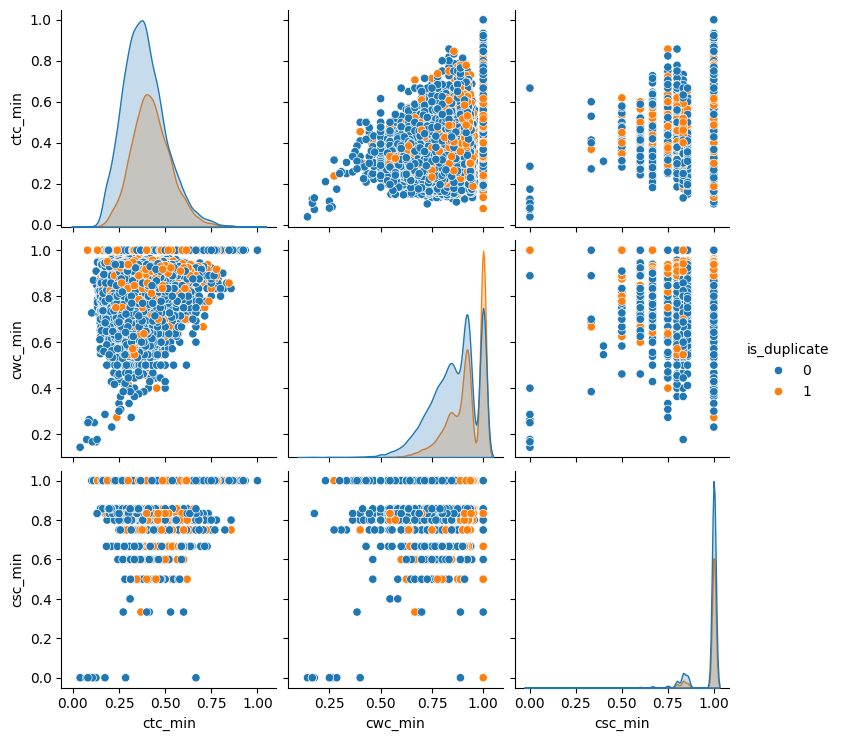

In [ ]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

In the above pair plot, the ‘ctc_min’ graph, we can clearly say that when the ‘ctc_min’ value is less than 0.5, there is high chance of the question pair to be non-duplicate. However, with increasing values of ‘ctc_min’, there is a mixed probability of the questions being duplicate or non-duplicate pairs.

Considering the ‘cwc_min’, in the initial part between 0.5 to ~0.9, the number of non-duplicate questions is more. As the value approaches 1, the number of duplicate question pairs is high.

Through out the ‘csc_min’ graph, the number of non-duplicate questions is high than that of the number of duplicate question pairs.

<aside>
📌 The ‘ctc_min’ feature can help in analyzing the similarity and predicting the duplicate question pairs.

</aside>

Similarly, when the ‘ctc_max’, ‘csc_max’ and ‘cwc_mac’ features were analyzed, it was observed that the non-dupliacte question pairs were more in count than that of the duplicate ones. So, these features are not of much significance.

‘last_word_eq’, ‘first_word_eq’

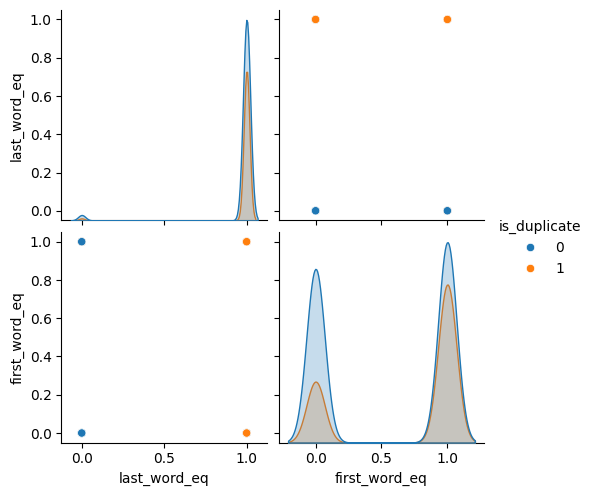

In [ ]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

From the above pair plot, it is evident that -

<aside>
📌 If the last words and the first words in a question pair are not matching, there is a high chance of that being a non-duplicate question pair and vice versa. This contradicts the hypothesis in case of equal last words.

</aside>